# **Phân tích đơn biến cho bộ dữ liệu thời tiết ERA5**

## I. Cài đặt và nhập các thư viện cần thiết

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


# II. Tải và chuẩn bị dữ liệu

In [4]:
era5 = pd.read_csv('../Final dataset/final_2016_2025_ERA5.csv')    
ndvi = pd.read_csv('../Final dataset/final_2016_2025_NDVI.csv')


In [3]:
print(era5.columns)


Index(['NAME_1', 'GID_1', 'NAME_2', 'GID_2', 'date', '2m_temperature_mean',
       'total_precipitation_sum', 'total_evaporation_sum',
       'potential_evaporation_sum', 'volumetric_soil_water_layer_1_mean',
       'volumetric_soil_water_layer_2_mean', 'surface_pressure_mean',
       '10m_u_component_of_wind_mean', '10m_v_component_of_wind_mean',
       'surface_net_solar_radiation_sum',
       'surface_solar_radiation_downwards_sum'],
      dtype='object')


In [5]:
era5.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425625 entries, 0 to 425624
Data columns (total 16 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   NAME_1                                 425625 non-null  object 
 1   GID_1                                  425625 non-null  object 
 2   NAME_2                                 425625 non-null  object 
 3   GID_2                                  425625 non-null  object 
 4   date                                   425625 non-null  object 
 5   2m_temperature_mean                    425625 non-null  float64
 6   total_precipitation_sum                425625 non-null  float64
 7   total_evaporation_sum                  425625 non-null  float64
 8   potential_evaporation_sum              425625 non-null  float64
 9   volumetric_soil_water_layer_1_mean     425625 non-null  float64
 10  volumetric_soil_water_layer_2_mean     425625 non-null  

In [5]:
len(sorted(era5['GID_2'].unique()))


133

In [6]:
len(sorted(ndvi['GID_2'].unique()))


133

# III. Exploratory Data Analysis

## 1. Phân tích đơn biến

### a. Biến 'total_precipitation_sum'

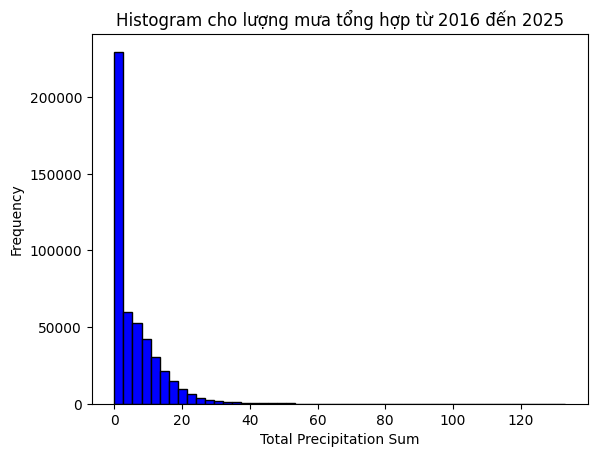

In [7]:
plt.hist(era5['total_precipitation_sum'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram cho lượng mưa tổng hợp từ 2016 đến 2025')
plt.xlabel('Total Precipitation Sum')
plt.ylabel('Frequency')
plt.show()


Trong suốt thời gian của bộ dữ liệu ( từ 1/1/2016 - 21/11/2025 ), chúng ta có thể thấy Đồng Bằng Sông Cửu Long thường tương đối ít mưa vì nằm trong vùng khí hậu nhiệt đới gió mùa, với mùa khô kéo dài từ tháng 11 đến tháng 4 và mùa mưa từ tháng 5 đến tháng 10. Tuy nhiên, trong những năm gần đây, do biến đổi khí hậu, các hiện tượng thời tiết cực đoan như mưa lớn đột ngột và lũ lụt đã trở nên phổ biến hơn.

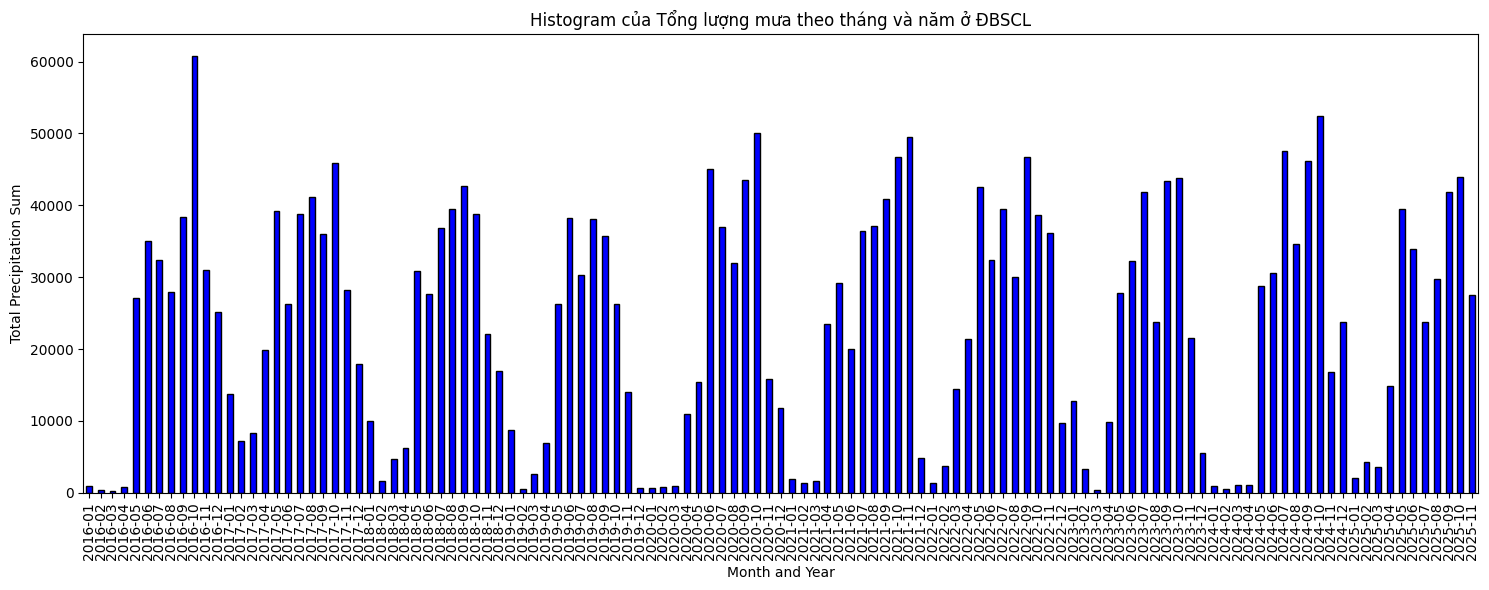

In [8]:
# Convert the 'date' column to datetime format
era5['date'] = pd.to_datetime(era5['date'])

# Extract year and month from the 'date' column
era5['year_month'] = era5['date'].dt.to_period('M')

# Group by year and month and calculate the sum of 'total_precipitation_sum'
monthly_precipitation = era5.groupby('year_month')['total_precipitation_sum'].sum()

# Plot the histogram
plt.figure(figsize=(15, 6))
monthly_precipitation.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Histogram của Tổng lượng mưa theo tháng và năm ở ĐBSCL')
plt.xlabel('Month and Year')
plt.ylabel('Total Precipitation Sum')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Tháng 10 năm 2016 đã có lượng mưa cao đột biến, có thể do ảnh hưởng của bão hoặc áp thấp nhiệt đới. Ngoài ra, các tháng 9 và 11 năm 2020 cũng ghi nhận lượng mưa cao, có thể liên quan đến các hiện tượng thời tiết như bão hoặc gió mùa Tây Nam mạnh.

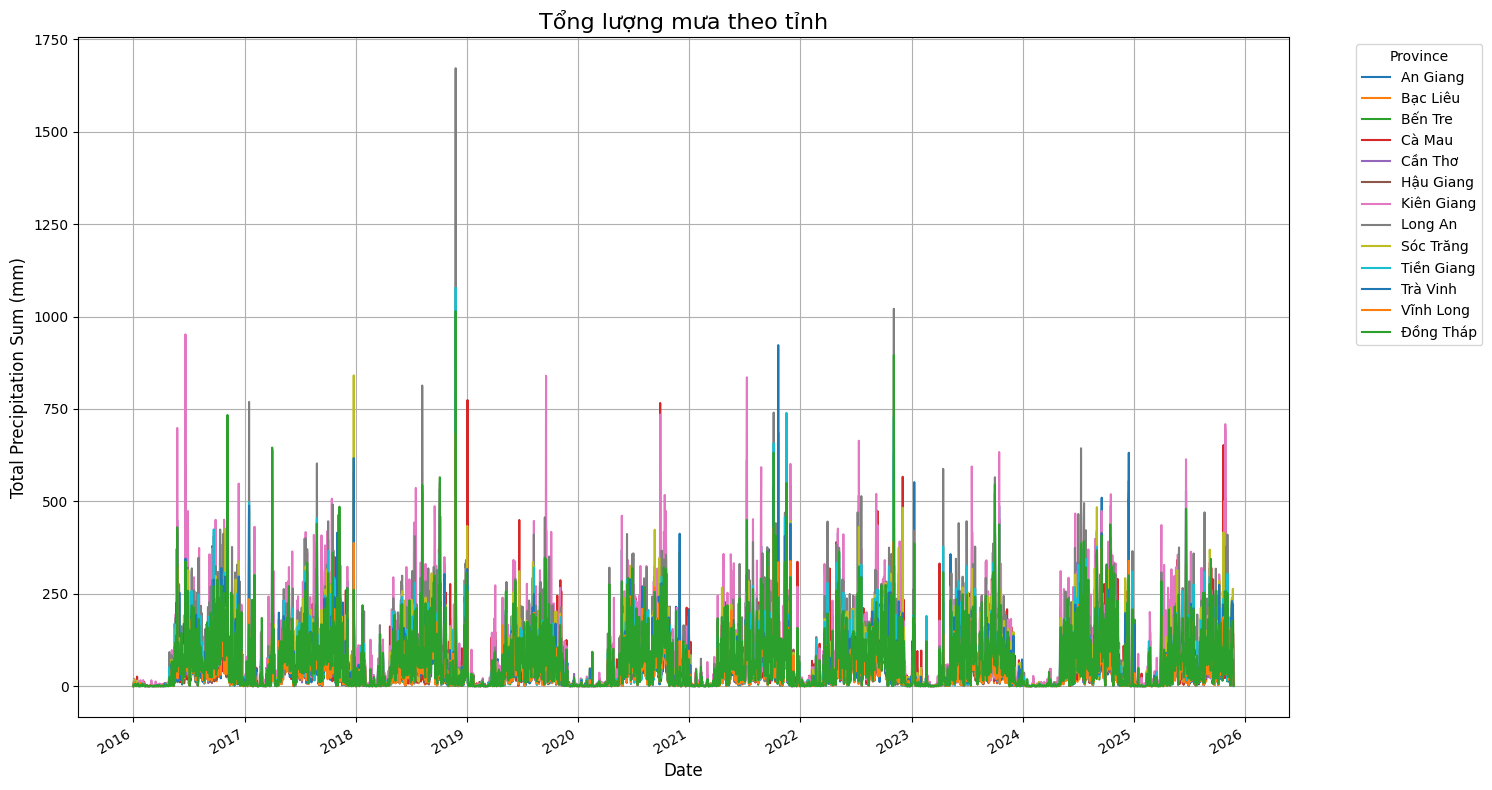

In [9]:
# Create a pivot table for total precipitation sum trends by province
province_precipitation_pivot = era5.pivot_table(
	index='date', 
	columns='NAME_1', 
	values='total_precipitation_sum', 
	aggfunc='sum'
)

# Plot the line graph
plt.figure(figsize=(15, 8))
province_precipitation_pivot.plot(ax=plt.gca(), linewidth=1.5)
plt.title('Tổng lượng mưa theo tỉnh', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Precipitation Sum (mm)', fontsize=12)
plt.legend(title='Province', bbox_to_anchor=(1.05, 1), loc='upper left')    
plt.grid(True)
plt.tight_layout()
plt.show()


Biểu đồ trên cho thấy lượng mưa cao đột biến vào cuối năm 2018 - đầu năm 2019 ở đâu đó một số tỉnh, để nhìn thấy rõ hiện tượng này, nhóm vẽ boxplot lượng mưa theo tỉnh cho thời gian đó.

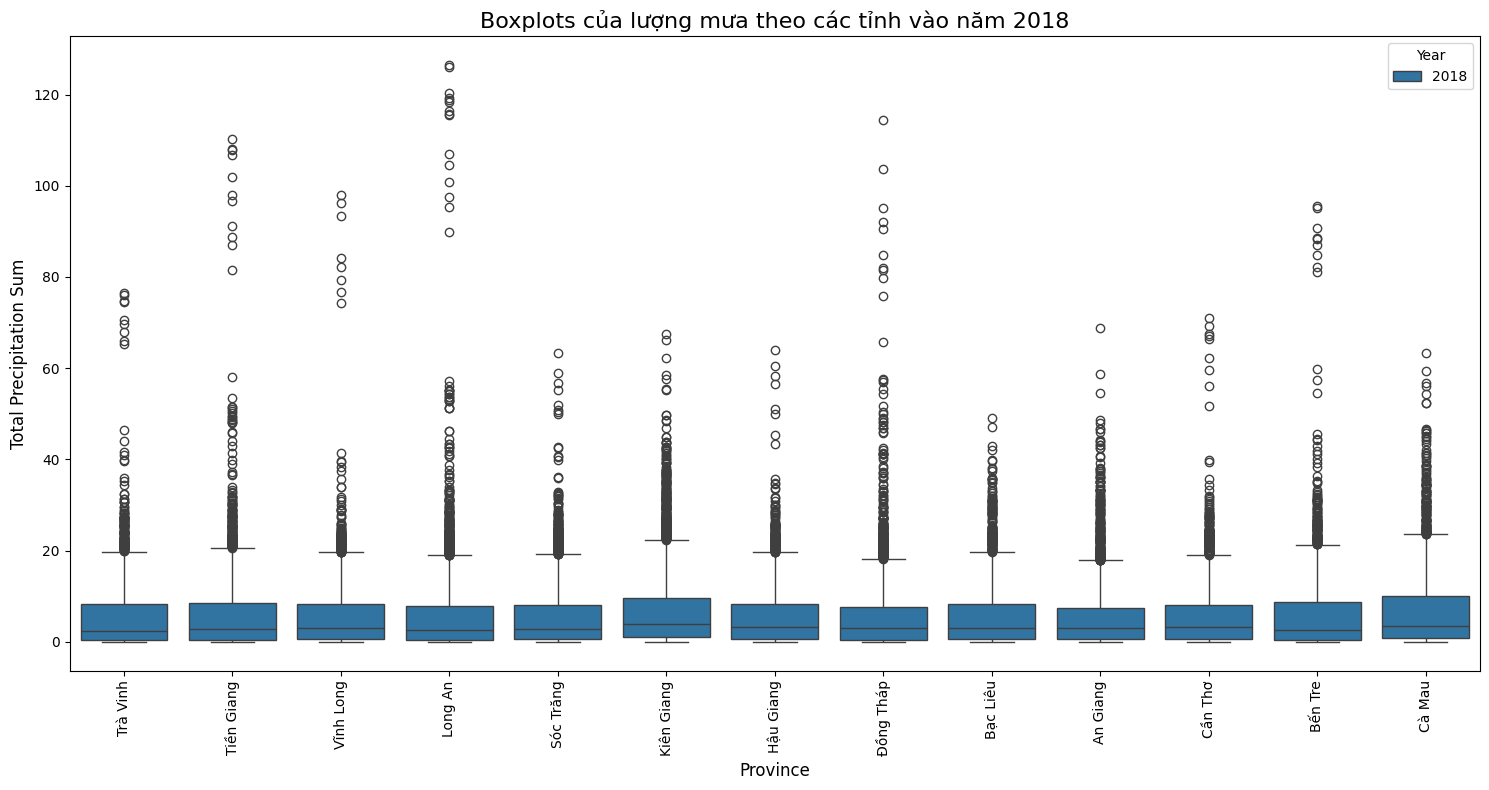

In [10]:
import seaborn as sns

# Filter data for the years 2018 and 2015
era5['year'] = pd.to_datetime(era5['date']).dt.year
data_2018 = era5[era5['year'] == 2018]

# Create a combined dataframe for plotting
data_combined = data_2018.assign(Year='2018')

# Plot the boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_combined, x='NAME_1', y='total_precipitation_sum', hue='Year')
plt.title('Boxplots của lượng mưa theo các tỉnh vào năm 2018', fontsize=16)
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Precipitation Sum', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Year')
plt.tight_layout()
plt.show()


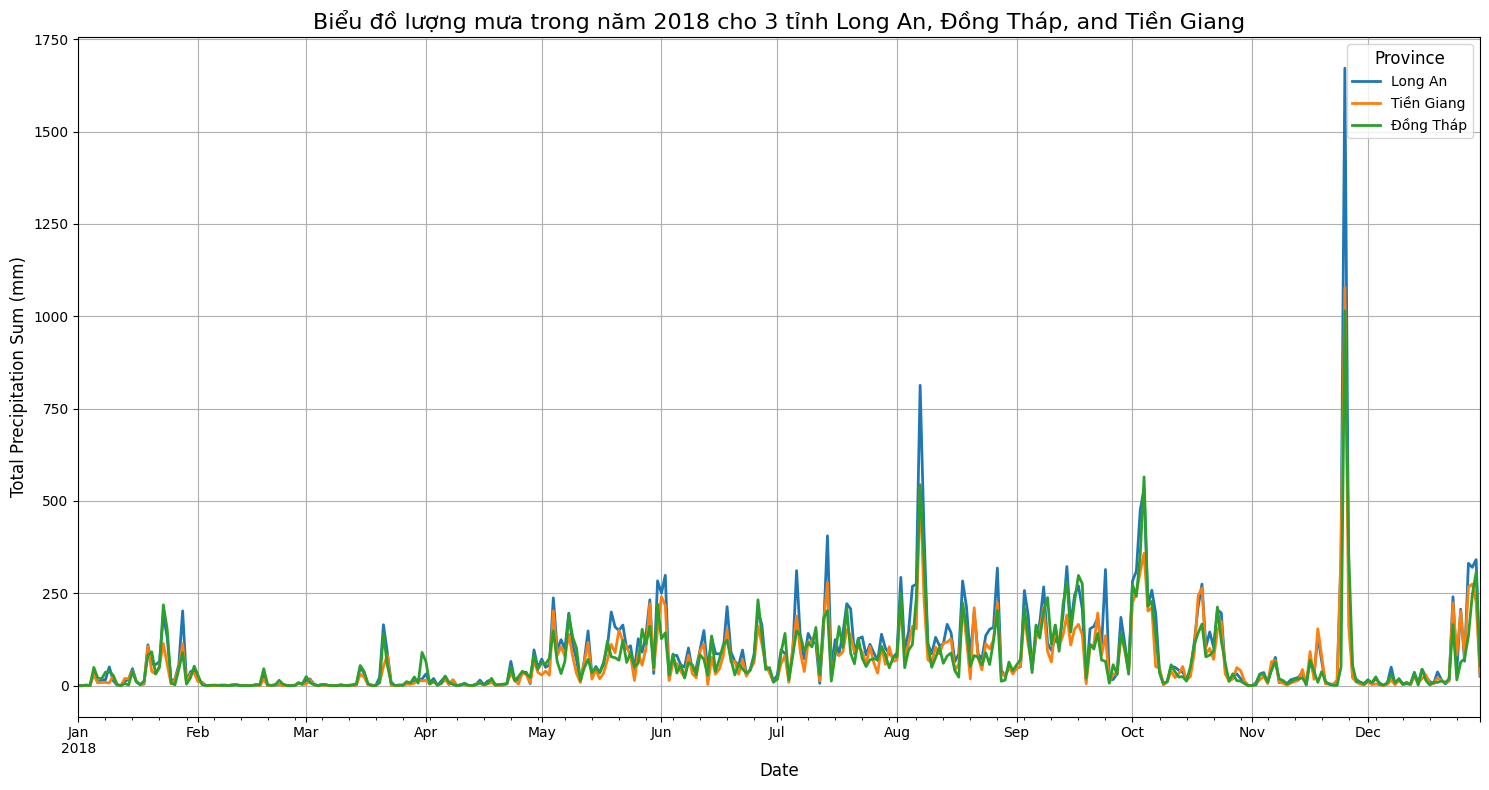

In [11]:
# Filter data for the year 2018 and the specified provinces
data_2018_provinces = era5[(era5['year'] == 2018) & (era5['NAME_1'].isin(['Long An', 'Đồng Tháp', 'Tiền Giang']))]

# Group by date and province, and calculate the total precipitation sum
province_precipitation_2018 = data_2018_provinces.groupby(['date', 'NAME_1'])['total_precipitation_sum'].sum().unstack()

# Plot the line graph
plt.figure(figsize=(15, 8))
province_precipitation_2018.plot(ax=plt.gca(), linewidth=2)
plt.title('Biểu đồ lượng mưa trong năm 2018 cho 3 tỉnh Long An, Đồng Tháp, and Tiền Giang', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Precipitation Sum (mm)', fontsize=12)
plt.legend(title='Province', fontsize=10, title_fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Cuối năm 2018, lượng mưa “cao đột biến” ở Long An, Tiền Giang, Đồng Tháp không chỉ do một trận mưa “khủng”, mà là do sự kết hợp của nhiều yếu tố: nền nước lũ cao sau mưa/lũ mùa trước, triều cường & hệ thống sông — kênh — rạch, và đợt mưa lớn do bão Usagi. Khi các điều kiện này đồng thời xuất hiện, chỉ cần một cơn mưa mạnh cũng dễ dẫn đến ngập nặng và khiến người dân cảm nhận “mưa nhiều bất thường/đột biến”.

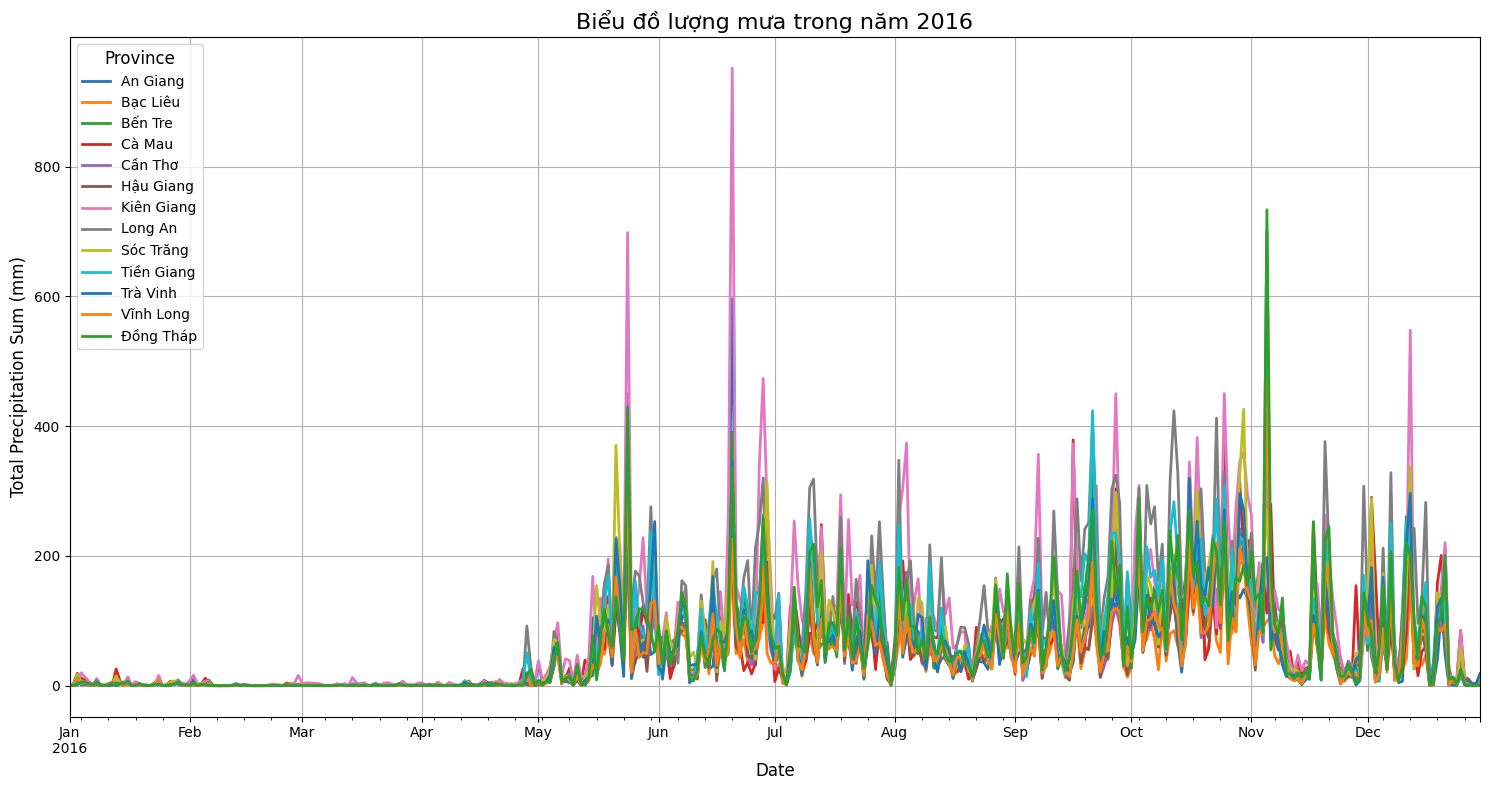

In [12]:
# Filter data for the year 2018 and the specified provinces
data_2018_provinces = era5[(era5['year'] == 2016) & (era5['NAME_1'].isin(era5['NAME_1'].unique()))]

# Group by date and province, and calculate the total precipitation sum
province_precipitation_2018 = data_2018_provinces.groupby(['date', 'NAME_1'])['total_precipitation_sum'].sum().unstack()

# Plot the line graph
plt.figure(figsize=(15, 8))
province_precipitation_2018.plot(ax=plt.gca(), linewidth=2)
plt.title('Biểu đồ lượng mưa trong năm 2016', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Precipitation Sum (mm)', fontsize=12)
plt.legend(title='Province', fontsize=10, title_fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Từ các plot trên, ta có thể thấy vào 2016 ( khoảng tháng 5 -6  ) thì Kiên Giang có đợt mưa khá lớn, trong khi ở 2018, các tỉnh nằm ở phía trên của ĐBSCL ( Long An, Đồng Tháp, )

Vào cuối tháng 9 - đầu tháng 10 năm 2018, ở ĐBSCL đã xảy ra lũ lớn bắt nguồn từ các cơn mưa to đột biến. Khi xét rộng về khoảng thời gian của dữ liệu, ta thấy lượng mưa này không phản ánh tổng quát về lượng mưa trung bình hàng năm của khu vực. Có thể sẽ cần phân tích thêm về các yếu tố khí hậu khác như nhiệt độ, độ ẩm và gió để hiểu rõ hơn về xu hướng thời tiết trong khu vực này.

### b. Biến '2m_temperature_mean'